# 

# Predicting Tensile Properties (Su & Sy) from Material Parameters

Three modeling approaches were tested:
- **Random Forest (RF):** non-linear ensemble baseline
- **Extreme Gradient Boosting (XGB):** tuned boosting model with feature importance analysis
- **Multi-Layer Perceptron (MLP):** neural network with scaled inputs and outputs

Models were trained on 80% of the dataset with 20% held out for testing. Performance was evaluated using **Mean Absolute Error (MAE)** and **R²** for both targets (Su, Sy).  
Parity and residual plots were generated to visualize predictions versus ground truth.


In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/materials/material.csv
/kaggle/input/materials/Decision Tree.py
/kaggle/input/materials/Data.csv
/kaggle/input/materials/decision_tree.png


# Clean the Data



In [2]:
Data=pd.read_csv("/kaggle/input/materials/material.csv")
Data

,Material,Su,Sy,E,G,mu,Ro,Use
0,ANSI Steel SAE 1015 as-rolled,421,314,207000,79000,0.30,7860,True
1,ANSI Steel SAE 1015 normalized,424,324,207000,79000,0.30,7860,True
2,ANSI Steel SAE 1015 annealed,386,284,207000,79000,0.30,7860,True
3,ANSI Steel SAE 1020 as-rolled,448,331,207000,79000,0.30,7860,True
4,ANSI Steel SAE 1020 normalized,441,346,207000,79000,0.30,7860,True
...,...,...,...,...,...,...,...,...
1547,JIS Nodular cast iron,600,370,169000,70000,0.20,7160,False
1548,JIS Nodular cast iron,700,420,169000,70000,0.20,7160,False
1549,JIS Nodular cast iron,800,480,169000,70000,0.20,7160,False
1550,JIS Malleable cast iron,400,180,160000,64000,0.27,7160,False


In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Material  1552 non-null   object 
 1   Su        1552 non-null   int64  
 2   Sy        1552 non-null   int64  
 3   E         1552 non-null   int64  
 4   G         1552 non-null   int64  
 5   mu        1552 non-null   float64
 6   Ro        1552 non-null   int64  
 7   Use       1552 non-null   bool   
dtypes: bool(1), float64(1), int64(5), object(1)
memory usage: 86.5+ KB


In [4]:
Data.isnull().sum()

Material    0
Su          0
Sy          0
E           0
G           0
mu          0
Ro          0
Use         0
dtype: int64

In [5]:
Data.duplicated().sum()

4

In [6]:
df=Data.copy()
duplicated_rows = df[df.duplicated()]
duplicated_names = duplicated_rows['Material'].unique()
print(duplicated_names)

['NF NF XC42TS ' 'NF NF XC55H1 ' 'NF NF Z15CN2413 ' 'NF NF Z12CNS2520 ']


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
duplicated_rows = df[df.duplicated()]
duplicated_names = duplicated_rows['Material'].unique()
print(duplicated_names)

[]


In [9]:
df

,Material,Su,Sy,E,G,mu,Ro,Use
0,ANSI Steel SAE 1015 as-rolled,421,314,207000,79000,0.30,7860,True
1,ANSI Steel SAE 1015 normalized,424,324,207000,79000,0.30,7860,True
2,ANSI Steel SAE 1015 annealed,386,284,207000,79000,0.30,7860,True
3,ANSI Steel SAE 1020 as-rolled,448,331,207000,79000,0.30,7860,True
4,ANSI Steel SAE 1020 normalized,441,346,207000,79000,0.30,7860,True
...,...,...,...,...,...,...,...,...
1547,JIS Nodular cast iron,600,370,169000,70000,0.20,7160,False
1548,JIS Nodular cast iron,700,420,169000,70000,0.20,7160,False
1549,JIS Nodular cast iron,800,480,169000,70000,0.20,7160,False
1550,JIS Malleable cast iron,400,180,160000,64000,0.27,7160,False


# Split: 

In [10]:
X = df[['E', 'G', 'mu', 'Ro']]
y = df[['Su', 'Sy']]

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale Data

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# RF MODEL

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

rf = RandomForestRegressor(
    n_estimators=300, 
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)


In [14]:
for i, col in enumerate(y.columns):
    mae = mean_absolute_error(y_test.iloc[:, i], y_pred[:, i])
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
    print(f"{col}: MAE = {mae:.2f}, R² = {r2:.3f}")

Su: MAE = 152.28, R² = 0.500
Sy: MAE = 144.61, R² = 0.359


### Su: 
$MAE$ = 152

$R^2$ = 0.5

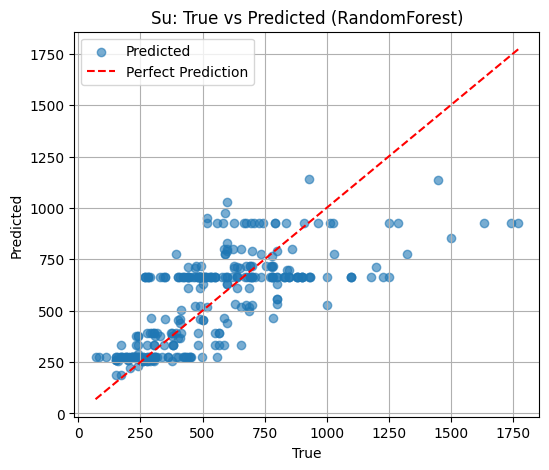

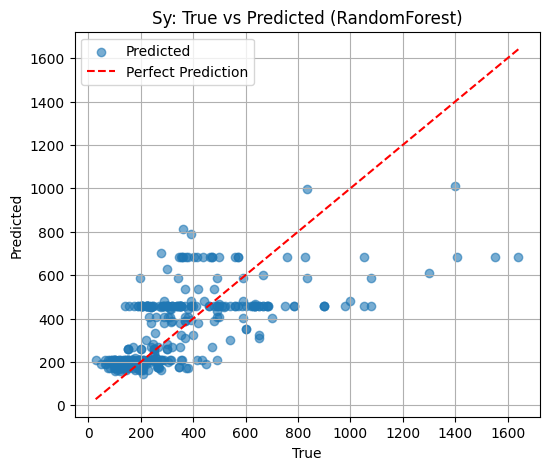

In [15]:
# Parity plots
for i, col in enumerate(y.columns):
    plt.figure(figsize=(6, 5))
    plt.scatter(y_test.iloc[:, i], y_pred[:, i], alpha=0.6, label='Predicted')
    plt.plot([y_test.iloc[:, i].min(), y_test.iloc[:, i].max()],
             [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()],
             'r--', label='Perfect Prediction')
    plt.title(f'{col}: True vs Predicted (RandomForest)')
    plt.xlabel('True')
    plt.ylabel('Predicted')
    plt.legend()
    plt.grid(True)
    plt.show()


## Cross Validation & parameter grid


Split first, fit the GridSearch ONLY on training fold

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

num_cols = X_train.select_dtypes(include=np.number).columns
cat_cols = X_train.select_dtypes(exclude=np.number).columns

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(with_mean=False) if len(num_cols) else "drop", num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore") if len(cat_cols) else "drop", cat_cols),
    ],
    remainder="passthrough",
)

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

param_grid = {
    'model__n_estimators': [100, 300, 500],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
}

pipe = Pipeline(steps=[
    ("prep", preprocess),
    ("model", rf),
])

cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=cv,
    scoring='r2',
    n_jobs=-1,
    verbose=0,
    refit=True,
    return_train_score=False,
    error_score='raise'
)

grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)
print("CV best R²:", grid_search.best_score_)

y_pred = grid_search.predict(X_test)
print("Test R²:", r2_score(y_test, y_pred))


Best params: {'model__max_depth': 20, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 100}
CV best R²: 0.3436058139569768
Test R²: 0.4226517825764803


In [17]:
best_rf = grid_search.best_estimator_
y_pred_cv = best_rf.predict(X_test)

from sklearn.metrics import mean_absolute_error, r2_score

for i, col in enumerate(y.columns):
    mae = mean_absolute_error(y_test.iloc[:, i], y_pred_cv[:, i])
    r2 = r2_score(y_test.iloc[:, i], y_pred_cv[:, i])
    print(f"{col}: MAE = {mae:.2f}, R² = {r2:.3f}")


Su: MAE = 153.13, R² = 0.494
Sy: MAE = 145.10, R² = 0.351


In [18]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

y_pred = best_rf.predict(X_test)

def regression_report(y_true_df, y_pred_np, targets=('Su','Sy')):
    rows = []
    for i, t in enumerate(targets):
        true = y_true_df[t].values
        pred = y_pred_np[:, i]
        mae  = mean_absolute_error(true, pred)
        rmse = mean_squared_error(true, pred, squared=True)**0.5
        r2   = r2_score(true, pred)
        mape = mean_absolute_percentage_error(true, pred) * 100
        rows.append([t, mae, rmse, r2, mape, 100-mape])
    return pd.DataFrame(rows, columns=['Target','MAE','RMSE','R2','MAPE_%','Acc_(100-MAPE)%'])

results_rf = regression_report(y_test, y_pred, targets=list(y_test.columns))
results_rf


,Target,MAE,RMSE,R2,MAPE_%,Acc_(100-MAPE)%
0,Su,153.132187,205.485959,0.494336,32.401417,67.598583
1,Sy,145.099795,199.867761,0.350967,49.843167,50.156833


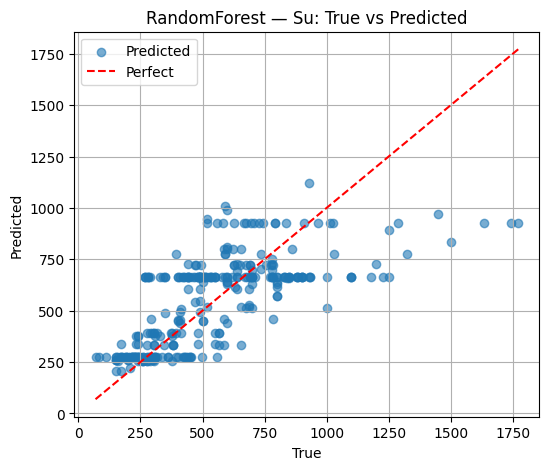

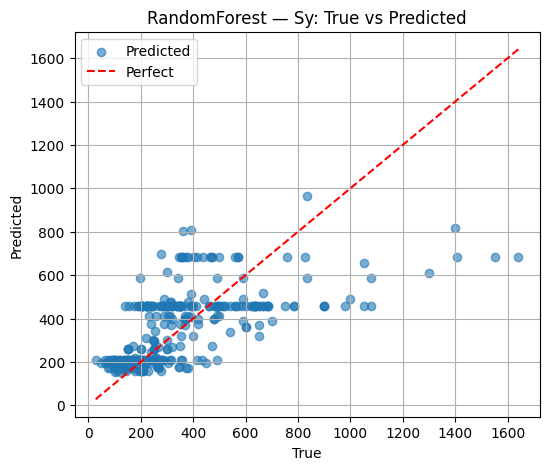

In [19]:
import matplotlib.pyplot as plt

def parity_plot(y_true, y_pred, title=''):
    lo = min(y_true.min(), y_pred.min())
    hi = max(y_true.max(), y_pred.max())
    plt.figure(figsize=(6,5))
    plt.scatter(y_true, y_pred, alpha=0.6, label='Predicted')
    plt.plot([lo, hi], [lo, hi], 'r--', label='Perfect')
    plt.title(title)
    plt.xlabel('True')
    plt.ylabel('Predicted')
    plt.legend()
    plt.grid(True)
    plt.show()

# Su
parity_plot(y_test['Su'].values, y_pred[:,0], title='RandomForest — Su: True vs Predicted')

# Sy
parity_plot(y_test['Sy'].values, y_pred[:,1], title='RandomForest — Sy: True vs Predicted')


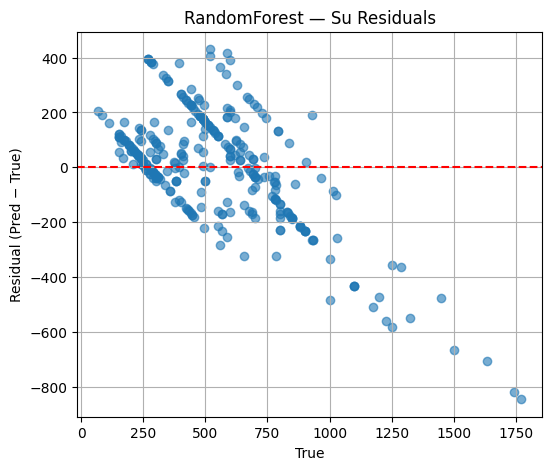

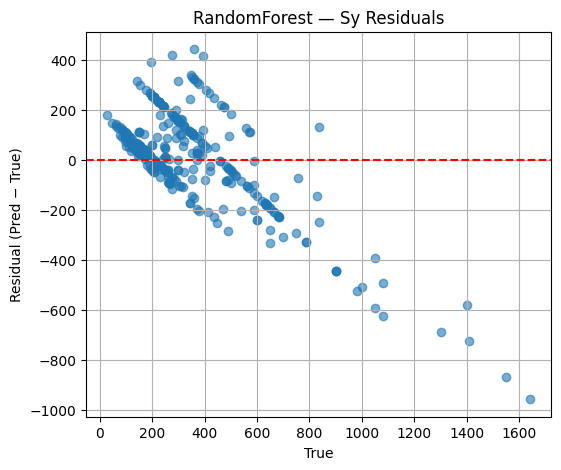

In [20]:
def residual_plot(y_true, y_pred, title=''):
    resid = y_pred - y_true
    plt.figure(figsize=(6,5))
    plt.axhline(0, linestyle='--', color='r')
    plt.scatter(y_true, resid, alpha=0.6)
    plt.title(title)
    plt.xlabel('True')
    plt.ylabel('Residual (Pred − True)')
    plt.grid(True)
    plt.show()

residual_plot(y_test['Su'].values, y_pred[:,0], title='RandomForest — Su Residuals')
residual_plot(y_test['Sy'].values, y_pred[:,1], title='RandomForest — Sy Residuals')


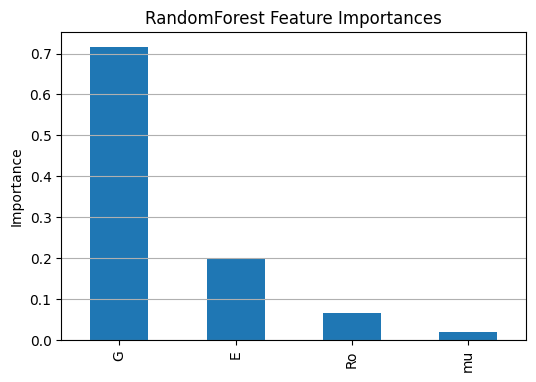

G     0.716669
E     0.197584
Ro    0.065657
mu    0.020090
dtype: float64

In [21]:
rf = best_rf.named_steps["model"]  # grab the actual RandomForestRegressor
importances = pd.Series(rf.feature_importances_, index=X_test.columns).sort_values(ascending=False)
ax = importances.plot(kind='bar', figsize=(6,4), title='RandomForest Feature Importances')
ax.set_ylabel('Importance')
plt.grid(axis='y')
plt.show()

importances


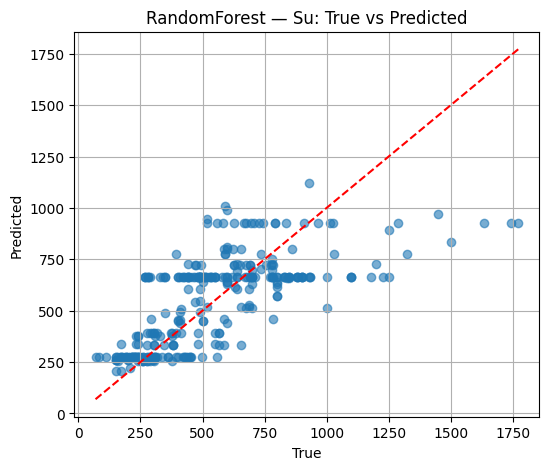

In [22]:
# Example: save the Su parity plot
plt.figure(figsize=(6,5))
lo = min(y_test['Su'].min(), y_pred[:,0].min())
hi = max(y_test['Su'].max(), y_pred[:,0].max())
plt.scatter(y_test['Su'].values, y_pred[:,0], alpha=0.6)
plt.plot([lo,hi],[lo,hi],'r--')
plt.title('RandomForest — Su: True vs Predicted')
plt.xlabel('True'); plt.ylabel('Predicted'); plt.grid(True)
plt.savefig('rf_su_parity.png', dpi=150, bbox_inches='tight')


In [23]:
import numpy as np

su_lt_sy_true = (y_test['Su'] < y_test['Sy']).mean()*100
print(f"% of ground-truth rows with Su < Sy: {su_lt_sy_true:.2f}%")

su_lt_sy_pred = (y_pred[:,0] < y_pred[:,1]).mean()*100
print(f"% of predictions with Su < Sy: {su_lt_sy_pred:.2f}%")

lhs = X_test['E'].values.astype(float)
rhs = 2*X_test['G'].values*(1+X_test['mu'].values)
rel_err = np.abs(lhs - rhs) / np.maximum(lhs, 1e-9)
print(f"E vs 2G(1+mu) — median rel error: {np.median(rel_err):.3%}, 90th pct: {np.percentile(rel_err,90):.3%}")

% of ground-truth rows with Su < Sy: 0.32%
% of predictions with Su < Sy: 0.00%
E vs 2G(1+mu) — median rel error: 0.971%, 90th pct: 5.260%


# XGB MODEL

## Train XGB

In [24]:
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from scipy.stats import randint, uniform
import numpy as np

# CV setup
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Base single-output regressor (fast tree method)
xgb_base = XGBRegressor(
    objective='reg:squarederror',
    tree_method='hist',        # fast on CPU
    random_state=42,
    n_estimators=500,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    n_jobs=1                   
)

# Wrap for multi-output
xgb_multi = MultiOutputRegressor(xgb_base, n_jobs=None)  # let outer CV parallelize

param_dist = {
    'estimator__n_estimators': randint(300, 900),
    'estimator__max_depth': randint(3, 9),
    'estimator__learning_rate': uniform(0.01, 0.15),
    'estimator__subsample': uniform(0.6, 0.4),
    'estimator__colsample_bytree': uniform(0.6, 0.4),
    'estimator__min_child_weight': randint(1, 6),
    'estimator__reg_lambda': uniform(0.0, 2.0),
    'estimator__reg_alpha': uniform(0.0, 0.5),
}

xgb_search = RandomizedSearchCV(
    xgb_multi,
    param_distributions=param_dist,
    n_iter=25,               
    scoring='r2',
    cv=cv,
    n_jobs=-1,                # outer parallelism only
    verbose=1,
    random_state=42
)

xgb_search.fit(X, y)
best_xgb = xgb_search.best_estimator_
print("XGB best params:", xgb_search.best_params_)
print("XGB best CV R²:", xgb_search.best_score_)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
XGB best params: {'estimator__colsample_bytree': 0.6296178606936361, 'estimator__learning_rate': 0.06376985928164089, 'estimator__max_depth': 3, 'estimator__min_child_weight': 4, 'estimator__n_estimators': 434, 'estimator__reg_alpha': 0.42501928889489965, 'estimator__reg_lambda': 0.8989013482764068, 'estimator__subsample': 0.6381640465961645}
XGB best CV R²: 0.3668014830938433


  Target         MAE        RMSE        R2     MAPE_%  Acc_(100-MAPE)%
0     Su  146.688147  198.055289  0.530246  31.353216        68.646784
1     Sy  138.039884  191.468269  0.404373  47.685348        52.314652


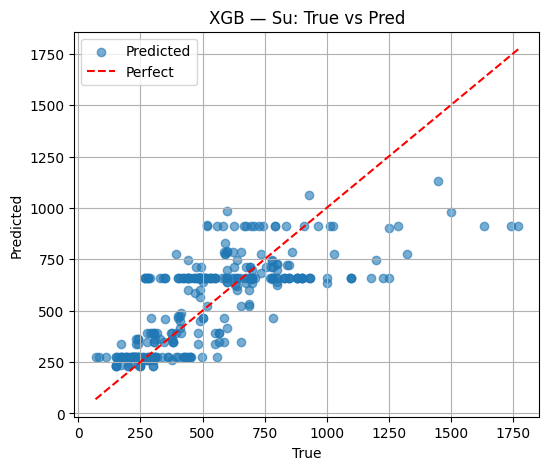

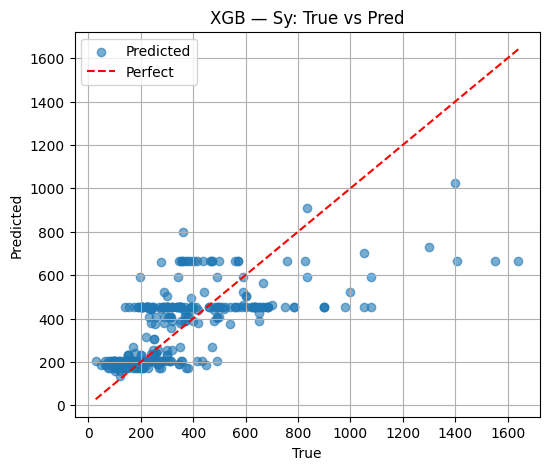

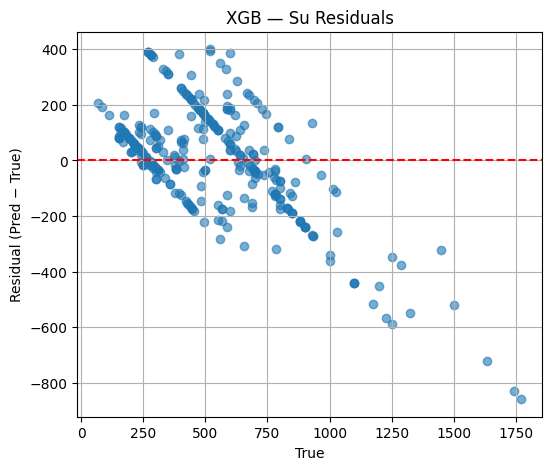

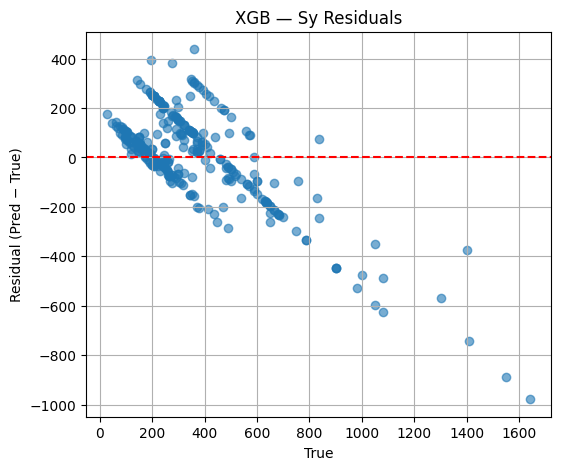

In [25]:
# Predict on your held-out test set
y_pred_xgb = best_xgb.predict(X_test)

# Results table (reuses your helper)
results_xgb = regression_report(y_test, y_pred_xgb, targets=list(y_test.columns))
print(results_xgb)

# Parity plots
parity_plot(y_test['Su'].values, y_pred_xgb[:,0], title='XGB — Su: True vs Pred')
parity_plot(y_test['Sy'].values, y_pred_xgb[:,1], title='XGB — Sy: True vs Pred')

# Residual plots
residual_plot(y_test['Su'].values, y_pred_xgb[:,0], title='XGB — Su Residuals')
residual_plot(y_test['Sy'].values, y_pred_xgb[:,1], title='XGB — Sy Residuals')


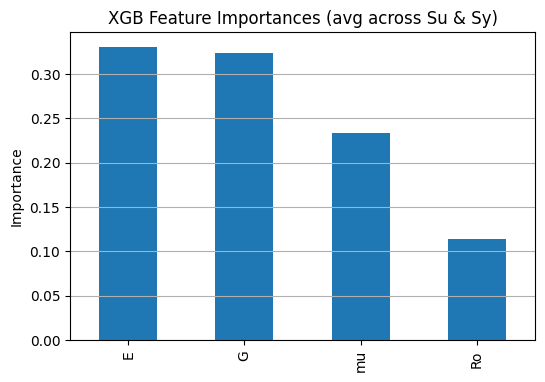

E     0.330490
G     0.323314
mu    0.232912
Ro    0.113283
dtype: float32

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

feature_names = list(X.columns)

imps = []
for est in best_xgb.estimators_:
    imps.append(est.feature_importances_)
imps = np.vstack(imps)                     
mean_imp = imps.mean(axis=0)

fi = pd.Series(mean_imp, index=feature_names).sort_values(ascending=False)
ax = fi.plot(kind='bar', figsize=(6,4), title='XGB Feature Importances (avg across Su & Sy)')
ax.set_ylabel('Importance')
plt.grid(axis='y')
plt.show()

fi


# MLP MODEL

## Scale

In [27]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

#Standardize
x_scaler = StandardScaler().fit(X_train)
Xtr = x_scaler.transform(X_train)
Xte = x_scaler.transform(X_test)

#0-1
y_scaler = MinMaxScaler().fit(y_train)
ytr = y_scaler.transform(y_train)   # shape: (n, 2)
yte = y_scaler.transform(y_test)


## Train MLP

In [28]:
from tensorflow.keras import layers, models, callbacks, optimizers

def build_mlp(n_in, lr=1e-3, h1=128, h2=64, dropout=0.2):
    model = models.Sequential([
        layers.Input(shape=(n_in,)),
        layers.Dense(h1, activation='relu'),
        layers.Dropout(dropout),
        layers.Dense(h2, activation='relu'),
        layers.Dense(2)  # 2 targets: Su, Sy (scaled)
    ])
    model.compile(optimizer=optimizers.Adam(lr), loss='mae')
    return model

mlp = build_mlp(Xtr.shape[1], lr=1e-3, h1=128, h2=64, dropout=0.2)

early = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

history = mlp.fit(
    Xtr, ytr,
    validation_data=(Xte, yte),
    epochs=500,
    batch_size=32,
    callbacks=[early],
    verbose=0
)

print("Best val_loss:", min(history.history['val_loss']))


2025-09-24 21:24:55.161882: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758749095.362494      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758749095.422034      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-09-24 21:25:05.588460: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Best val_loss: 0.06979169696569443


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
  Target         MAE        RMSE        R2     MAPE_%  Acc_(100-MAPE)%
0     Su  153.796702  221.161865  0.414242  30.505556        69.494444
1     Sy  136.582092  218.137366  0.226890  39.569882        60.430118


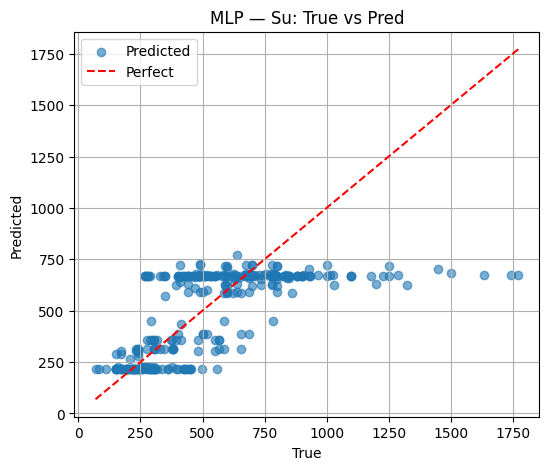

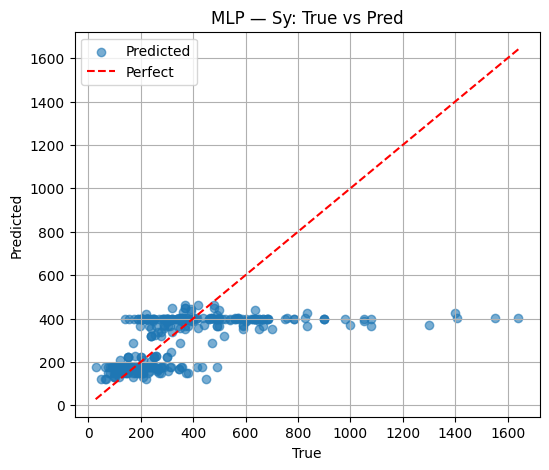

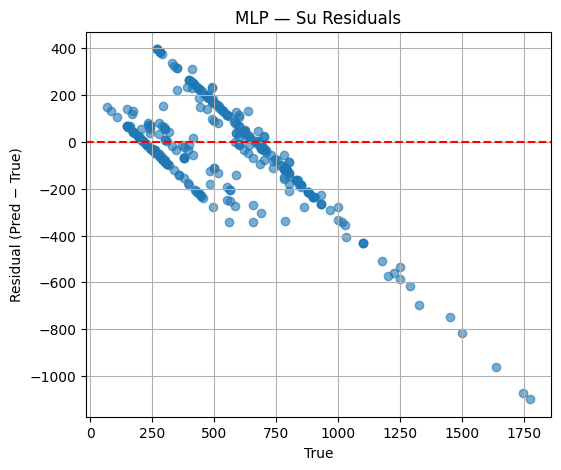

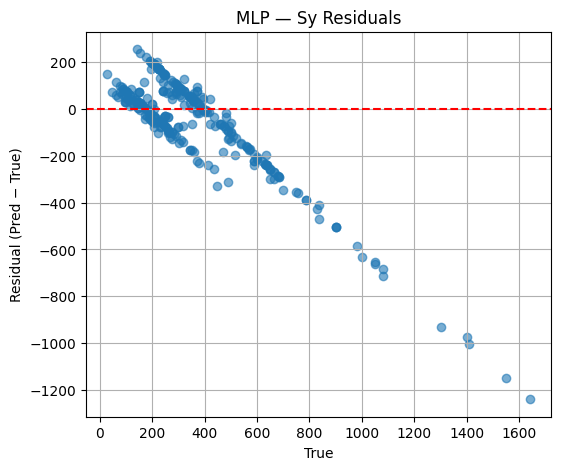

In [29]:
# Predict
y_pred_scaled = mlp.predict(Xte)
y_pred_mlp = y_scaler.inverse_transform(y_pred_scaled)

# Compate
results_mlp = regression_report(y_test, y_pred_mlp, targets=list(y_test.columns))
print(results_mlp)

# Plots
parity_plot(y_test['Su'].values, y_pred_mlp[:,0], title='MLP — Su: True vs Pred')
parity_plot(y_test['Sy'].values, y_pred_mlp[:,1], title='MLP — Sy: True vs Pred')

residual_plot(y_test['Su'].values, y_pred_mlp[:,0], title='MLP — Su Residuals')
residual_plot(y_test['Sy'].values, y_pred_mlp[:,1], title='MLP — Sy Residuals')


Best val_loss from sweep: 0.06944555789232254
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
  Target         MAE        RMSE        R2     MAPE_%  Acc_(100-MAPE)%
0     Su  151.897468  223.888171  0.399712  29.335776        70.664224
1     Sy  136.978924  216.278172  0.240013  40.943733        59.056267


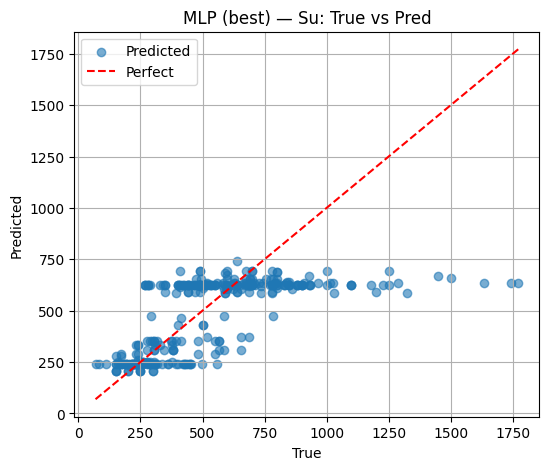

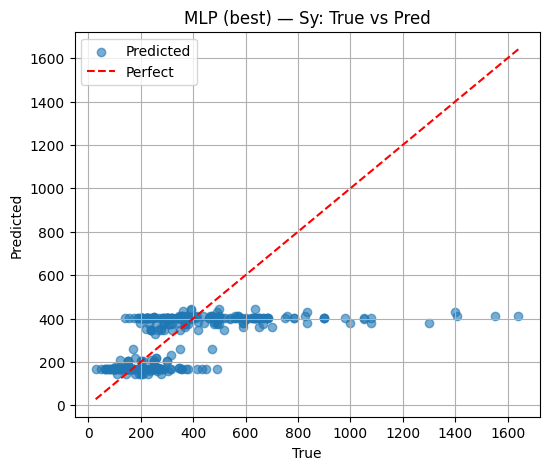

In [30]:
candidates = [
    dict(lr=1e-3, h1=128, h2=64,  dropout=0.2, batch=32),
    dict(lr=5e-4, h1=256, h2=128, dropout=0.3, batch=32),
    dict(lr=1e-3, h1=256, h2=64,  dropout=0.1, batch=64),
    dict(lr=2e-3, h1=128, h2=64,  dropout=0.2, batch=32),
]

best_mlp, best_val = None, np.inf
for cfg in candidates:
    m = build_mlp(Xtr.shape[1], **{k:cfg[k] for k in ['lr','h1','h2','dropout']})
    h = m.fit(
        Xtr, ytr,
        validation_data=(Xte, yte),
        epochs=300, batch_size=cfg['batch'],
        callbacks=[callbacks.EarlyStopping(patience=15, restore_best_weights=True)],
        verbose=0
    )
    v = min(h.history['val_loss'])
    if v < best_val:
        best_val, best_mlp = v, m

print("Best val_loss from sweep:", best_val)

# Evaluate best
y_pred_scaled_best = best_mlp.predict(Xte)
y_pred_mlp_best = y_scaler.inverse_transform(y_pred_scaled_best)
results_mlp_best = regression_report(y_test, y_pred_mlp_best, targets=list(y_test.columns))
print(results_mlp_best)

parity_plot(y_test['Su'].values, y_pred_mlp_best[:,0], title='MLP (best) — Su: True vs Pred')
parity_plot(y_test['Sy'].values, y_pred_mlp_best[:,1], title='MLP (best) — Sy: True vs Pred')


In [31]:
import joblib
mlp.save('mlp_su_sy.h5')
joblib.dump(x_scaler, 'x_scaler.pkl')
joblib.dump(y_scaler, 'y_scaler.pkl')


['y_scaler.pkl']

# RF vs. XGB vs. MLP

In [32]:
# Ensure you have y_pred from RF (best_rf), XGB (best_xgb), and MLP (best_mlp)
y_pred_rf  = best_rf.predict(X_test)
y_pred_xgb = best_xgb.predict(X_test)
y_pred_mlp = y_pred_mlp_best  # from above sweep (or y_pred_mlp if you skip sweep)

tab_rf  = regression_report(y_test, y_pred_rf,  targets=list(y_test.columns));  tab_rf.insert(0,'Model','RandomForest')
tab_xgb = regression_report(y_test, y_pred_xgb, targets=list(y_test.columns));  tab_xgb.insert(0,'Model','XGBoost')
tab_mlp = regression_report(y_test, y_pred_mlp, targets=list(y_test.columns));  tab_mlp.insert(0,'Model','MLP')

final_table = (
    pd.concat([tab_rf, tab_xgb, tab_mlp], axis=0)
      .reset_index(drop=True)
)
final_table


,Model,Target,MAE,RMSE,R2,MAPE_%,Acc_(100-MAPE)%
0,RandomForest,Su,153.132187,205.485959,0.494336,32.401417,67.598583
1,RandomForest,Sy,145.099795,199.867761,0.350967,49.843167,50.156833
2,XGBoost,Su,146.688147,198.055289,0.530246,31.353216,68.646784
3,XGBoost,Sy,138.039884,191.468269,0.404373,47.685348,52.314652
4,MLP,Su,151.897468,223.888171,0.399712,29.335776,70.664224
5,MLP,Sy,136.978924,216.278172,0.240013,40.943733,59.056267
